In [1]:
!python han-font.py
exec(open('han-font.py').read())

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
#1
desa=pd.read_csv('대사중후군.csv', encoding = 'cp949')
desa.head(3)
desa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ex1ex2co  91 non-null     int64  
 1   exco      91 non-null     int64  
 2   site      91 non-null     int64  
 3   wc1       91 non-null     float64
 4   wc2       91 non-null     float64
 5   tg1       91 non-null     int64  
 6   tg2       91 non-null     int64  
 7   hdl1      91 non-null     int64  
 8   hdl2      91 non-null     int64  
 9   ldl1      91 non-null     int64  
 10  ldl2      91 non-null     int64  
 11  gl1       91 non-null     int64  
 12  gl2       91 non-null     int64  
 13  sbp1      91 non-null     int64  
 14  sbp2      91 non-null     int64  
 15  dsp1      91 non-null     int64  
 16  dsp2      91 non-null     int64  
 17  we1       91 non-null     float64
 18  we2       91 non-null     float64
 19  체지방1      91 non-null     float64
 20  체지방2      91 non-null     float64


In [3]:
desa['ex1ex2co'] = desa['ex1ex2co'].astype(object)
desa['exco'] = desa['exco'].astype(object)
desa['건강'] = desa['건강'].astype(object)
desa['수입'] = desa['수입'].astype(object)
desa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ex1ex2co  91 non-null     object 
 1   exco      91 non-null     object 
 2   site      91 non-null     int64  
 3   wc1       91 non-null     float64
 4   wc2       91 non-null     float64
 5   tg1       91 non-null     int64  
 6   tg2       91 non-null     int64  
 7   hdl1      91 non-null     int64  
 8   hdl2      91 non-null     int64  
 9   ldl1      91 non-null     int64  
 10  ldl2      91 non-null     int64  
 11  gl1       91 non-null     int64  
 12  gl2       91 non-null     int64  
 13  sbp1      91 non-null     int64  
 14  sbp2      91 non-null     int64  
 15  dsp1      91 non-null     int64  
 16  dsp2      91 non-null     int64  
 17  we1       91 non-null     float64
 18  we2       91 non-null     float64
 19  체지방1      91 non-null     float64
 20  체지방2      91 non-null     float64


In [4]:
#2
desa.groupby(['exco']).mean()[['wc1', 'wc2', 'bmi1', 'bmi2']]

,wc1,wc2,bmi1,bmi2
exco,,,,
1,93.502817,89.401408,26.51831,25.56338
2,94.885000,95.200000,27.14000,26.93000


In [5]:
desa.loc[desa['age']<50, 'agegroup']='50대미만'
desa.loc[(desa['age']>=50) & (desa['age']<60), 'agegroup']='50대'
desa.loc[(desa['age']>=60) & (desa['age']<70), 'agegroup']='60대'
desa.loc[desa['age']>=70, 'agegroup']='70대이상'
desa.loc[:, ['age', 'agegroup']]

,age,agegroup
0,69.0,60대
1,63.0,60대
2,62.0,60대
3,59.0,50대
4,NaN,NaN
...,...,...
86,76.0,70대이상
87,41.0,50대미만
88,65.0,60대
89,71.0,70대이상


In [6]:
desa.loc[desa['건강']==1, 'guengang']='건강매우좋음'
desa.loc[desa['건강']==2, 'guengang']='건강좋음'
desa.loc[desa['건강']==3, 'guengang']='보통'
desa.loc[desa['건강']==4, 'guengang']='건강나쁨'
desa.loc[desa['건강']==5, 'guengang']='건강매우나쁨'
desa.loc[:, ['건강', 'guengang']]

,건강,guengang
0,5.0,건강매우나쁨
1,3.0,보통
2,2.0,건강좋음
3,NaN,NaN
4,NaN,NaN
...,...,...
86,2.0,건강좋음
87,2.0,건강좋음
88,2.0,건강좋음
89,5.0,건강매우나쁨


In [7]:
#4-1 wc, bmi의 수치변화 계산
desa['wc']=desa['wc2']-desa['wc1']
desa.wc.head(5)

0    -1.6
1    -5.2
2     0.4
3     0.6
4     1.8
     ... 
86    1.5
87   -7.5
88   -0.6
89    1.1
90    3.6
Name: wc, Length: 91, dtype: float64

In [8]:
desa['bmi']=desa['bmi2']-desa['bmi1']
desa.bmi.head(5)

0   -0.8
1   -1.6
2   -0.5
3   -0.2
4   -0.2
Name: bmi, dtype: float64

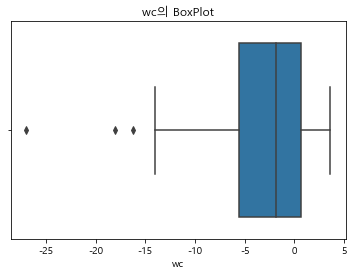

In [10]:
#4-2 wc, bmi에 대한 박스플랏
sns.boxplot(x='wc', data=desa)
plt.title("wc의 BoxPlot")
plt.show()

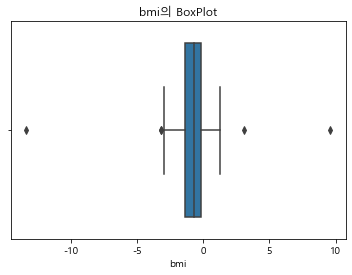

In [11]:
sns.boxplot(x='bmi', data=desa)
plt.title("bmi의 BoxPlot")
plt.show()

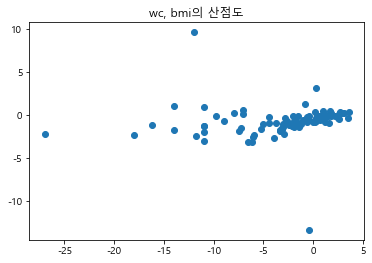

In [12]:
#4-3 wc, bmi의 산점도
plt.scatter(x='wc', y='bmi', data=desa)
plt.title("wc, bmi의 산점도")
plt.show()

In [13]:
desa.삶의질.describe()

count    91.000000
mean     54.767253
std      19.946527
min      10.190000
25%      39.865000
50%      53.600000
75%      70.120000
max      95.380000
Name: 삶의질, dtype: float64

In [14]:
freq,bins=np.histogram(desa['삶의질'], bins=7)
bins

array([10.19, 22.36, 34.53, 46.7 , 58.87, 71.04, 83.21, 95.38])

In [15]:
freq_class=['10.19~22.36', '22.36~34.53', '34.53~46.70', '46.70~58.87',
            '58.87~71.04', '71.04~83.21', '83.21~95.38',]
freq_table=pd.DataFrame({'frequency':freq}, 
                        index=pd.Index(freq_class, name='class'))
freq_table

,frequency
class,
10.19~22.36,4
22.36~34.53,10
34.53~46.70,23
46.70~58.87,16
58.87~71.04,17
71.04~83.21,12
83.21~95.38,9


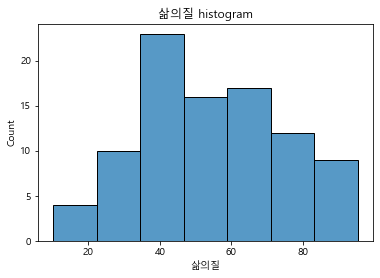

In [18]:
sns.histplot(desa['삶의질'], bins=7)
plt.title('삶의질 histogram')
plt.show()

In [19]:
#6-1 변수 ex1ex2co에 따른 삶의 질의 기초통계량
desa.groupby(['ex1ex2co']).describe()[['삶의질']]

삶의질                                                            
         count       mean        std    min      25%    50%     75%    max
ex1ex2co                                                                  
1         38.0  55.059737  20.620682  13.88  38.8925  53.19  72.005  95.38
2         33.0  53.961818  19.677531  10.19  40.1500  55.57  69.850  86.03
3         20.0  55.540500  20.062674  20.18  40.6150  53.52  66.340  95.10

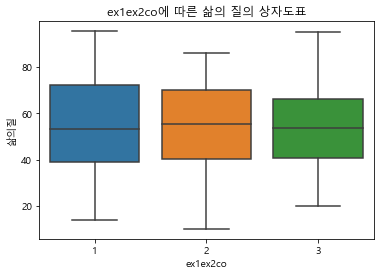

In [20]:
#6-2 변수 ex1ex2co에 따른 삶의 질의 상자도표
sns.boxplot(x='ex1ex2co', y='삶의질', data=desa)
plt.title('ex1ex2co에 따른 삶의 질의 상자도표')
plt.show()

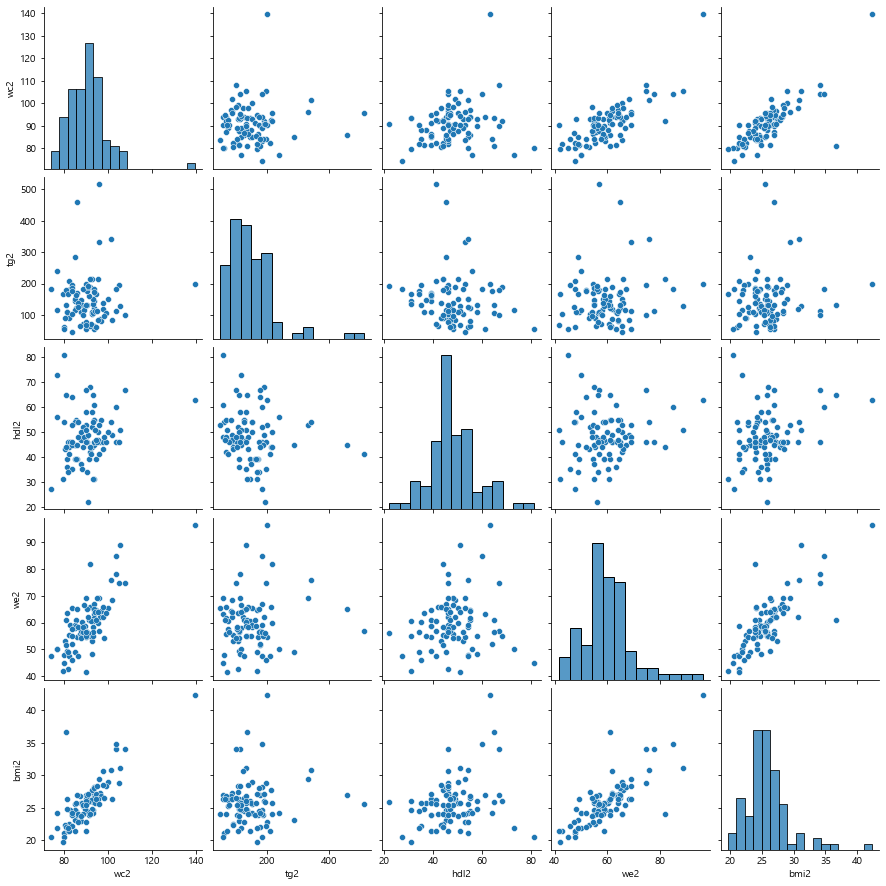

In [21]:
#7-1 대사중후군 환자의 건강프로그램 적용후 수치의 행렬산점도
sns.pairplot(data=desa, vars=['wc2', 'tg2', 'hdl2', 'we2', 'bmi2'])
plt.show()

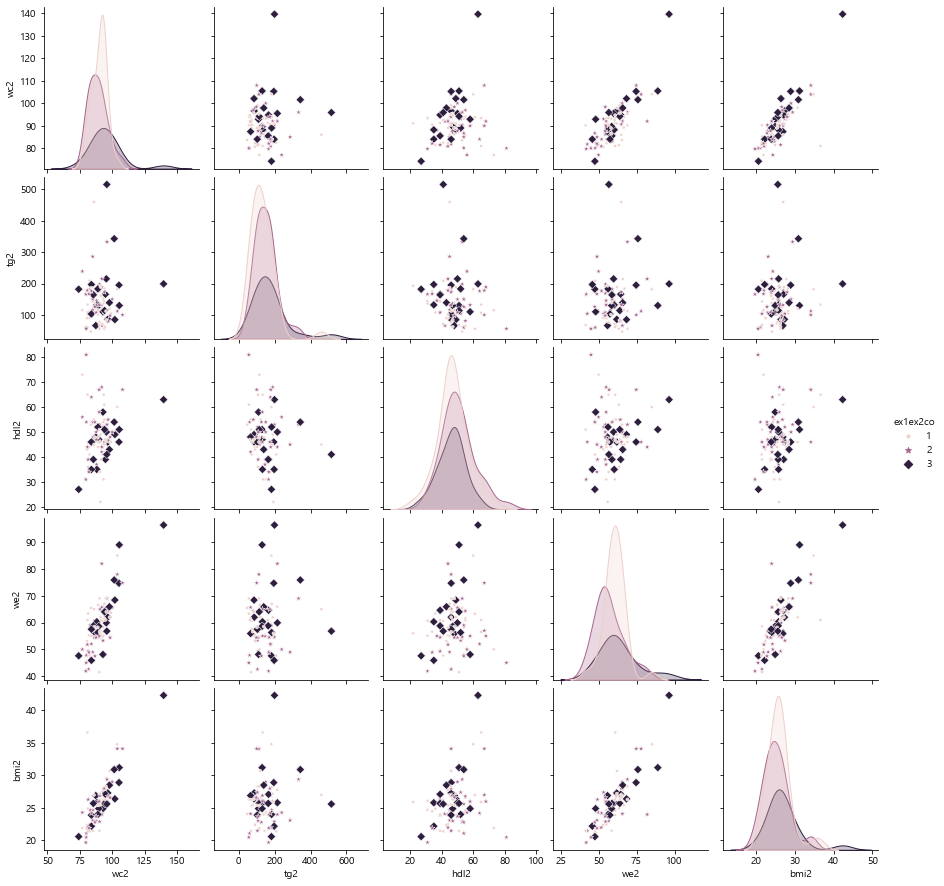

In [22]:
#7-2 그룹변수(ex1ex2co)에 따른 대사중후군 수치의 행렬산점도
sns.pairplot(data=desa, vars=['wc2', 'tg2', 'hdl2', 'we2', 'bmi2'],
             hue='ex1ex2co', markers=['.', '*', 'D'])
plt.show()

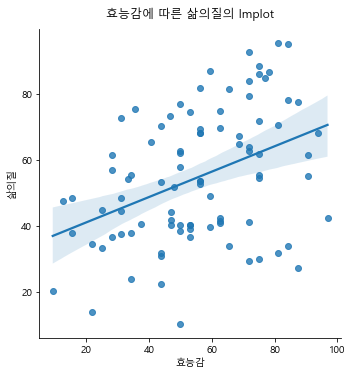

In [23]:
#8-1 효능감(x), 삶의질(y) 의 평가점수의 lmplot
sns.lmplot(x="효능감", y="삶의질", data=desa)
plt.title("효능감에 따른 삶의질의 lmplot", y=1.02)
plt.show()

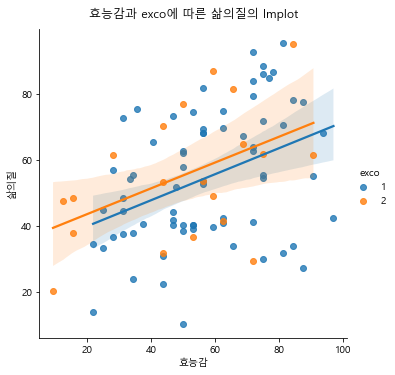

In [24]:
#8-2 효능감(x1), exco(x2), 삶의질(y) 의 평가점수의 lmplot
sns.lmplot(x="효능감", y="삶의질", hue='exco', data=desa)
plt.title("효능감과 exco에 따른 삶의질의 lmplot", y=1.02)
plt.show()